In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path

pd.set_option('display.max_columns', 500)

In [48]:
# Load data 

folder_path = Path("NAOO")
dfs = [pd.read_csv(file, low_memory=False) for file in folder_path.glob("*.csv.gz")]

In [49]:
len(dfs)

75

In [53]:
# Concatenate into one dataframe
df = pd.concat(dfs, ignore_index=True)
df.columns = df.columns.str.lower()
df.head()

,begin_yearmonth,begin_day,begin_time,end_yearmonth,end_day,end_time,episode_id,event_id,state,state_fips,year,month_name,event_type,cz_type,cz_fips,cz_name,wfo,begin_date_time,cz_timezone,end_date_time,injuries_direct,injuries_indirect,deaths_direct,deaths_indirect,damage_property,damage_crops,source,magnitude,magnitude_type,flood_cause,category,tor_f_scale,tor_length,tor_width,tor_other_wfo,tor_other_cz_state,tor_other_cz_fips,tor_other_cz_name,begin_range,begin_azimuth,begin_location,end_range,end_azimuth,end_location,begin_lat,begin_lon,end_lat,end_lon,episode_narrative,event_narrative,data_source
0,195004,28,1445,195004,28,1445,NaN,10096222,OKLAHOMA,40.0,1950,April,Tornado,C,149,WASHITA,NaN,28-APR-50 14:45:00,CST,28-APR-50 14:45:00,0,0,0,0,250K,0,NaN,0.0,NaN,NaN,NaN,F3,3.4,400.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,35.12,-99.20,35.17,-99.20,NaN,NaN,PUB
1,195004,29,1530,195004,29,1530,NaN,10120412,TEXAS,48.0,1950,April,Tornado,C,93,COMANCHE,NaN,29-APR-50 15:30:00,CST,29-APR-50 15:30:00,0,0,0,0,25K,0,NaN,0.0,NaN,NaN,NaN,F1,11.5,200.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,31.90,-98.60,31.73,-98.60,NaN,NaN,PUB
2,195007,5,1800,195007,5,1800,NaN,10104927,PENNSYLVANIA,42.0,1950,July,Tornado,C,77,LEHIGH,NaN,05-JUL-50 18:00:00,CST,05-JUL-50 18:00:00,2,0,0,0,25K,0,NaN,0.0,NaN,NaN,NaN,F2,12.9,33.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,40.58,-75.70,40.65,-75.47,NaN,NaN,PUB
3,195007,5,1830,195007,5,1830,NaN,10104928,PENNSYLVANIA,42.0,1950,July,Tornado,C,43,DAUPHIN,NaN,05-JUL-50 18:30:00,CST,05-JUL-50 18:30:00,0,0,0,0,2.5K,0,NaN,0.0,NaN,NaN,NaN,F2,0.0,13.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,40.60,-76.75,NaN,NaN,NaN,NaN,PUB
4,195007,24,1440,195007,24,1440,NaN,10104929,PENNSYLVANIA,42.0,1950,July,Tornado,C,39,CRAWFORD,NaN,24-JUL-50 14:40:00,CST,24-JUL-50 14:40:00,0,0,0,0,2.5K,0,NaN,0.0,NaN,NaN,NaN,F0,0.0,33.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,41.63,-79.68,NaN,NaN,NaN,NaN,PUB


In [50]:
# Check number of events 
len(df.event_id.unique())

1937859

In [52]:
# Check type of events - We see that some are very similar and we will probably consider them as only one type 
df.event_type.unique()

array(['Tornado', 'Hail', 'Thunderstorm Wind',
       'TORNADOES, TSTM WIND, HAIL', 'THUNDERSTORM WINDS/FLOODING',
       'HAIL/ICY ROADS', 'HAIL FLOODING',
       'THUNDERSTORM WINDS/FLASH FLOOD', 'THUNDERSTORM WINDS LIGHTNING',
       'THUNDERSTORM WIND/ TREES', 'THUNDERSTORM WIND/ TREE',
       'THUNDERSTORM WINDS FUNNEL CLOU', 'TORNADO/WATERSPOUT',
       'THUNDERSTORM WINDS/HEAVY RAIN', 'THUNDERSTORM WINDS HEAVY RAIN',
       'THUNDERSTORM WINDS/ FLOOD', 'High Wind', 'Flash Flood',
       'Winter Storm', 'Blizzard', 'Cold/Wind Chill', 'Heavy Snow',
       'Flood', 'Ice Storm', 'Dense Fog', 'Winter Weather', 'Avalanche',
       'Frost/Freeze', 'Lightning', 'Heat', 'Heavy Rain', 'Funnel Cloud',
       'Coastal Flood', 'Strong Wind', 'Wildfire', 'Waterspout',
       'High Surf', 'Dust Storm', 'Drought', 'Rip Current', 'Dust Devil',
       'Tropical Storm', 'Debris Flow', 'Hurricane (Typhoon)',
       'Freezing Fog', 'Storm Surge/Tide', 'Marine High Wind', 'Sleet',
       'Lake-Effect

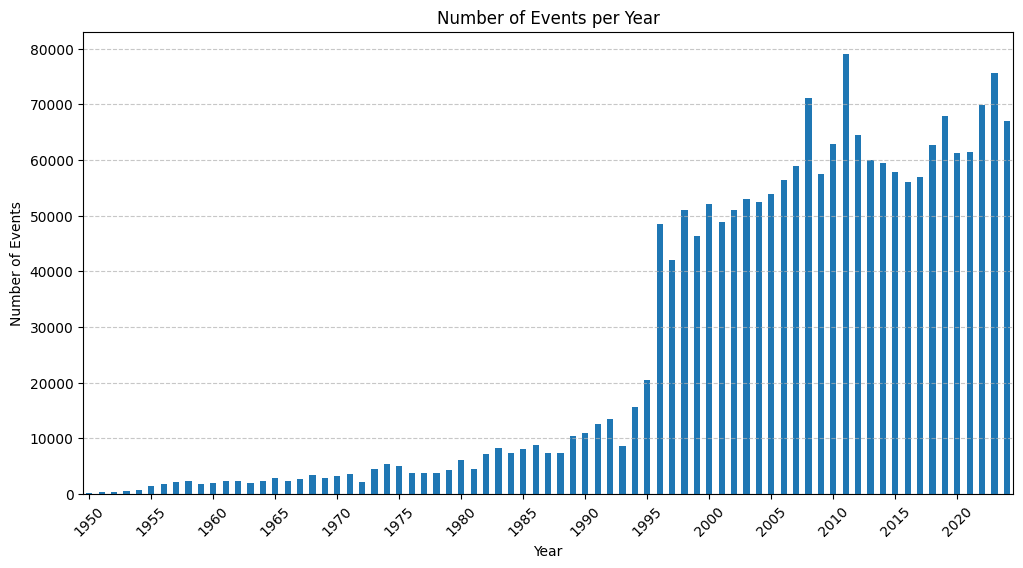

In [57]:
# Plot number of events per year - The huge increase in year 1996 is due to more type of events being listed

# Group by year and count events
yearly_counts = df_combined.groupby('year')['event_id'].count()

# Create the bar plot
plt.figure(figsize=(12, 6))
yearly_counts.plot(kind='bar')

# Customize labels
plt.xlabel("Year")
plt.ylabel("Number of Events")
plt.title("Number of Events per Year")

# Set x-axis ticks to show only years that are multiples of 5 or 0
years = yearly_counts.index.astype(int)  # Ensure years are integers
tick_positions = [i for i, year in enumerate(years) if year % 5 == 0]
tick_labels = [year for year in years if year % 5 == 0]
plt.xticks(tick_positions, tick_labels, rotation=45)
# plt.yscale('log')

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [58]:
df.columns

Index(['begin_yearmonth', 'begin_day', 'begin_time', 'end_yearmonth',
       'end_day', 'end_time', 'episode_id', 'event_id', 'state', 'state_fips',
       'year', 'month_name', 'event_type', 'cz_type', 'cz_fips', 'cz_name',
       'wfo', 'begin_date_time', 'cz_timezone', 'end_date_time',
       'injuries_direct', 'injuries_indirect', 'deaths_direct',
       'deaths_indirect', 'damage_property', 'damage_crops', 'source',
       'magnitude', 'magnitude_type', 'flood_cause', 'category', 'tor_f_scale',
       'tor_length', 'tor_width', 'tor_other_wfo', 'tor_other_cz_state',
       'tor_other_cz_fips', 'tor_other_cz_name', 'begin_range',
       'begin_azimuth', 'begin_location', 'end_range', 'end_azimuth',
       'end_location', 'begin_lat', 'begin_lon', 'end_lat', 'end_lon',
       'episode_narrative', 'event_narrative', 'data_source'],
      dtype='object')

In [7]:
df_combined["YEAR_START"] = df_combined["BEGIN_YEARMONTH"].astype(str).str[:4].astype(int) 
df_combined["MONTH_START"] = df_combined["BEGIN_YEARMONTH"].astype(str).str[4:].astype(int) 
df_combined["YEAR_END"] = df_combined["END_YEARMONTH"].astype(str).str[:4].astype(int) 
df_combined["MONTH_END"] = df_combined["END_YEARMONTH"].astype(str).str[4:].astype(int) 
df_combined.drop(columns='BEGIN_YEARMONTH', inplace=True)
df_combined.drop(columns='END_YEARMONTH', inplace=True)

In [12]:
df_combined.groupby('STATE')['EVENT_TYPE'].count().sort_values()

STATE
GUAM WATERS            2
Kentucky              12
ST LAWRENCE R         28
GULF OF ALASKA        37
HAWAII WATERS         46
                   ...  
IOWA               67126
MISSOURI           69228
OKLAHOMA           78483
KANSAS             90371
TEXAS             156719
Name: EVENT_TYPE, Length: 70, dtype: int64

In [13]:
df_combined.groupby('YEAR')['EVENT_TYPE'].count()

YEAR
1950      223
1951      269
1952      272
1953      492
1954      609
        ...  
2020    61279
2021    61389
2022    69886
2023    75596
2024    67036
Name: EVENT_TYPE, Length: 75, dtype: int64

In [14]:
df_combined['STATE'].unique()

array(['OKLAHOMA', 'TEXAS', 'PENNSYLVANIA', 'NEBRASKA', 'MISSISSIPPI',
       'NEW MEXICO', 'ARKANSAS', 'MISSOURI', 'CONNECTICUT', 'FLORIDA',
       'NORTH CAROLINA', 'ALABAMA', 'KENTUCKY', 'MARYLAND', 'MINNESOTA',
       'SOUTH DAKOTA', 'IOWA', 'LOUISIANA', 'OHIO', 'KANSAS',
       'NORTH DAKOTA', 'INDIANA', 'COLORADO', 'SOUTH CAROLINA',
       'WEST VIRGINIA', 'WYOMING', 'GEORGIA', 'WISCONSIN', 'ILLINOIS',
       'TENNESSEE', 'NEW JERSEY', 'MICHIGAN', 'CALIFORNIA',
       'MASSACHUSETTS', 'NEW HAMPSHIRE', 'OREGON', 'VIRGINIA', 'ARIZONA',
       'NEW YORK', 'MONTANA', 'MAINE', 'VERMONT', 'UTAH', 'DELAWARE',
       'IDAHO', 'WASHINGTON', 'HAWAII', 'RHODE ISLAND', 'NEVADA',
       'PUERTO RICO', 'Kentucky', 'DISTRICT OF COLUMBIA', 'ALASKA',
       'VIRGIN ISLANDS', 'GUAM', 'AMERICAN SAMOA', 'ATLANTIC SOUTH',
       'LAKE ERIE', 'LAKE HURON', 'GULF OF MEXICO', 'LAKE ST CLAIR',
       'E PACIFIC', 'HAWAII WATERS', 'LAKE MICHIGAN', 'ATLANTIC NORTH',
       'LAKE ONTARIO', 'ST LAWRENCE R', 

In [16]:
df_combined['EVENT_TYPE'].value_counts()

EVENT_TYPE
Thunderstorm Wind                542141
Hail                             409725
Flash Flood                      104924
High Wind                         90644
Winter Storm                      87041
                                  ...  
TORNADO/WATERSPOUT                    1
THUNDERSTORM WIND/ TREE               1
THUNDERSTORM WINDS HEAVY RAIN         1
THUNDERSTORM WINDS/HEAVY RAIN         1
HAIL FLOODING                         1
Name: count, Length: 70, dtype: int64

In [17]:
df_combined.columns

Index(['BEGIN_DAY', 'BEGIN_TIME', 'END_DAY', 'END_TIME', 'EPISODE_ID',
       'EVENT_ID', 'STATE', 'STATE_FIPS', 'YEAR', 'MONTH_NAME', 'EVENT_TYPE',
       'CZ_TYPE', 'CZ_FIPS', 'CZ_NAME', 'WFO', 'BEGIN_DATE_TIME',
       'CZ_TIMEZONE', 'END_DATE_TIME', 'INJURIES_DIRECT', 'INJURIES_INDIRECT',
       'DEATHS_DIRECT', 'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS',
       'SOURCE', 'MAGNITUDE', 'MAGNITUDE_TYPE', 'FLOOD_CAUSE', 'CATEGORY',
       'TOR_F_SCALE', 'TOR_LENGTH', 'TOR_WIDTH', 'TOR_OTHER_WFO',
       'TOR_OTHER_CZ_STATE', 'TOR_OTHER_CZ_FIPS', 'TOR_OTHER_CZ_NAME',
       'BEGIN_RANGE', 'BEGIN_AZIMUTH', 'BEGIN_LOCATION', 'END_RANGE',
       'END_AZIMUTH', 'END_LOCATION', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT',
       'END_LON', 'EPISODE_NARRATIVE', 'EVENT_NARRATIVE', 'DATA_SOURCE',
       'YEAR_START', 'MONTH_START', 'YEAR_END', 'MONTH_END'],
      dtype='object')

<Axes: xlabel='YEAR'>

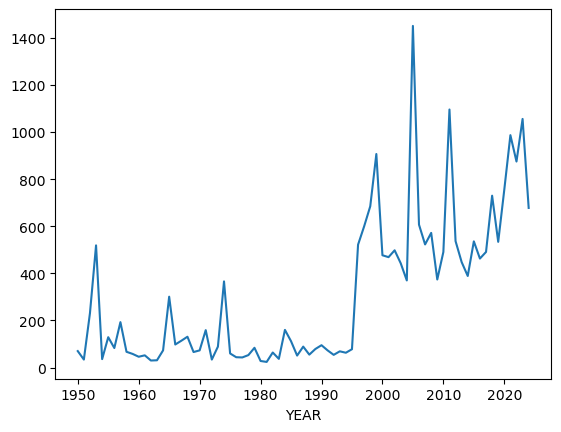

In [131]:
df_combined.groupby('YEAR')['DEATHS_DIRECT'].sum().plot()

<Axes: xlabel='YEAR'>

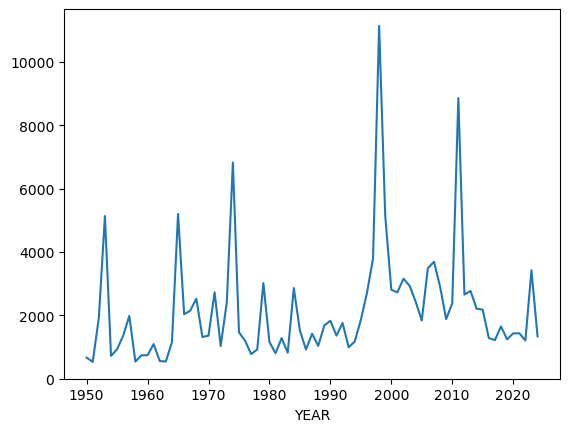

In [161]:
df_combined.groupby('YEAR')['INJURIES_DIRECT'].sum().plot()

In [149]:
def convert_damage(value):
    try:
        if value.endswith('K'):
            return float(value[:-1]) * 1_000
        elif value.endswith('M'):
            return float(value[:-1]) * 1_000_000
        else:
            return float(value)  # Conversion standard
    except ValueError:
        return np.nan  # Gérer les valeurs invalides

df_combined['DAMAGE_PROPERTY'] = df_combined['DAMAGE_PROPERTY'].astype(str).apply(convert_damage)
df_combined['DAMAGE_PROPERTY']

0          250000.0
1           25000.0
2           25000.0
3            2500.0
4            2500.0
             ...   
1937854         0.0
1937855         0.0
1937856         0.0
1937857     15000.0
1937858         0.0
Name: DAMAGE_PROPERTY, Length: 1937859, dtype: float64

<Axes: xlabel='YEAR'>

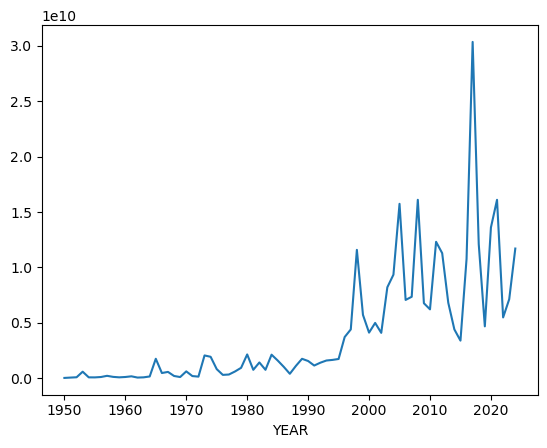

In [151]:
df_combined.groupby('YEAR')['DAMAGE_PROPERTY'].sum().plot()

<Axes: xlabel='YEAR'>

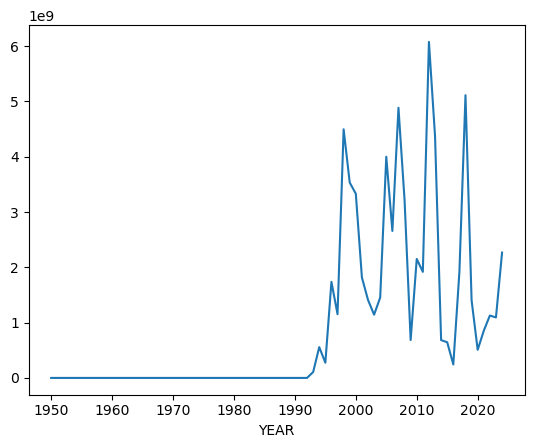

In [159]:
df_combined['DAMAGE_CROPS'] = df_combined['DAMAGE_CROPS'].astype(str).apply(convert_damage)
df_combined.groupby('YEAR')['DAMAGE_CROPS'].sum().plot()

In [165]:
df_combined['STATE'] = df_combined['STATE'].str.upper()

In [169]:
!pip install us

In [171]:
import us  # pip install us

valid_states = [state.name.upper() for state in us.states.STATES]
df_states = df_combined[df_combined['STATE'].isin(valid_states)]

In [173]:
df_states.shape

(1881027, 53)

In [175]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import LineString

# Convert rows into LineString geometries
df_combined['geometry'] = df_combined.apply(
    lambda row: LineString([(row['BEGIN_LON'], row['BEGIN_LAT']), (row['END_LON'], row['END_LAT'])]), axis=1
)

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(df_combined, geometry='geometry', crs="EPSG:4326")  # EPSG:4326 is WGS 84 (lat/lon)

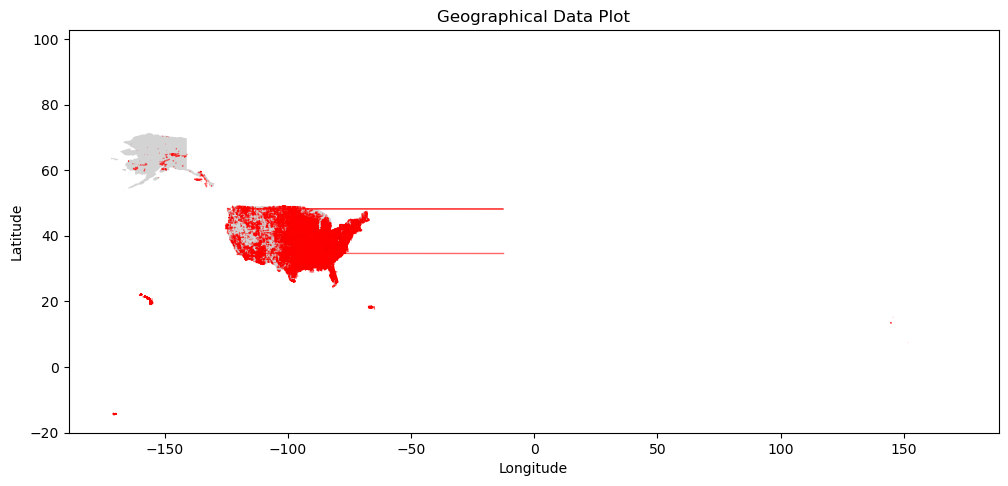

In [183]:
# Load USA base map

# Download the dataset
world = gpd.read_file("https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip")
gdf_filtered = gdf[gdf['STATE'] == 'TEXAS']  # Example: Only Texas

# Select only the USA
usa = world[world["ADMIN"] == "United States of America"]
# Plot
fig, ax = plt.subplots(figsize=(12, 8))
usa.plot(ax=ax, color='lightgray')  # Base map
gdf.plot(ax=ax, color='red', linewidth=1, alpha=0.6)  # Plot the lines

plt.title("Geographical Data Plot")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [185]:
df_moving = df_combined[df_combined['END_LAT'].isna() | df_combined['END_LON'].isna()]
df_moving.shape

(925990, 54)

In [189]:
df_combined.shape[0] - df_moving.shape[0]

1011869

In [18]:
df_combined.head()

,BEGIN_DAY,BEGIN_TIME,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,YEAR,MONTH_NAME,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,WFO,BEGIN_DATE_TIME,CZ_TIMEZONE,END_DATE_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,FLOOD_CAUSE,CATEGORY,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_WFO,TOR_OTHER_CZ_STATE,TOR_OTHER_CZ_FIPS,TOR_OTHER_CZ_NAME,BEGIN_RANGE,BEGIN_AZIMUTH,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE,YEAR_START,MONTH_START,YEAR_END,MONTH_END
0,28,1445,28,1445,NaN,10096222,OKLAHOMA,40.0,1950,April,Tornado,C,149,WASHITA,NaN,28-APR-50 14:45:00,CST,28-APR-50 14:45:00,0,0,0,0,250K,0,NaN,0.0,NaN,NaN,NaN,F3,3.4,400.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,35.12,-99.20,35.17,-99.20,NaN,NaN,PUB,1950,4,1950,4
1,29,1530,29,1530,NaN,10120412,TEXAS,48.0,1950,April,Tornado,C,93,COMANCHE,NaN,29-APR-50 15:30:00,CST,29-APR-50 15:30:00,0,0,0,0,25K,0,NaN,0.0,NaN,NaN,NaN,F1,11.5,200.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,31.90,-98.60,31.73,-98.60,NaN,NaN,PUB,1950,4,1950,4
2,5,1800,5,1800,NaN,10104927,PENNSYLVANIA,42.0,1950,July,Tornado,C,77,LEHIGH,NaN,05-JUL-50 18:00:00,CST,05-JUL-50 18:00:00,2,0,0,0,25K,0,NaN,0.0,NaN,NaN,NaN,F2,12.9,33.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,40.58,-75.70,40.65,-75.47,NaN,NaN,PUB,1950,7,1950,7
3,5,1830,5,1830,NaN,10104928,PENNSYLVANIA,42.0,1950,July,Tornado,C,43,DAUPHIN,NaN,05-JUL-50 18:30:00,CST,05-JUL-50 18:30:00,0,0,0,0,2.5K,0,NaN,0.0,NaN,NaN,NaN,F2,0.0,13.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,40.60,-76.75,NaN,NaN,NaN,NaN,PUB,1950,7,1950,7
4,24,1440,24,1440,NaN,10104929,PENNSYLVANIA,42.0,1950,July,Tornado,C,39,CRAWFORD,NaN,24-JUL-50 14:40:00,CST,24-JUL-50 14:40:00,0,0,0,0,2.5K,0,NaN,0.0,NaN,NaN,NaN,F0,0.0,33.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,41.63,-79.68,NaN,NaN,NaN,NaN,PUB,1950,7,1950,7


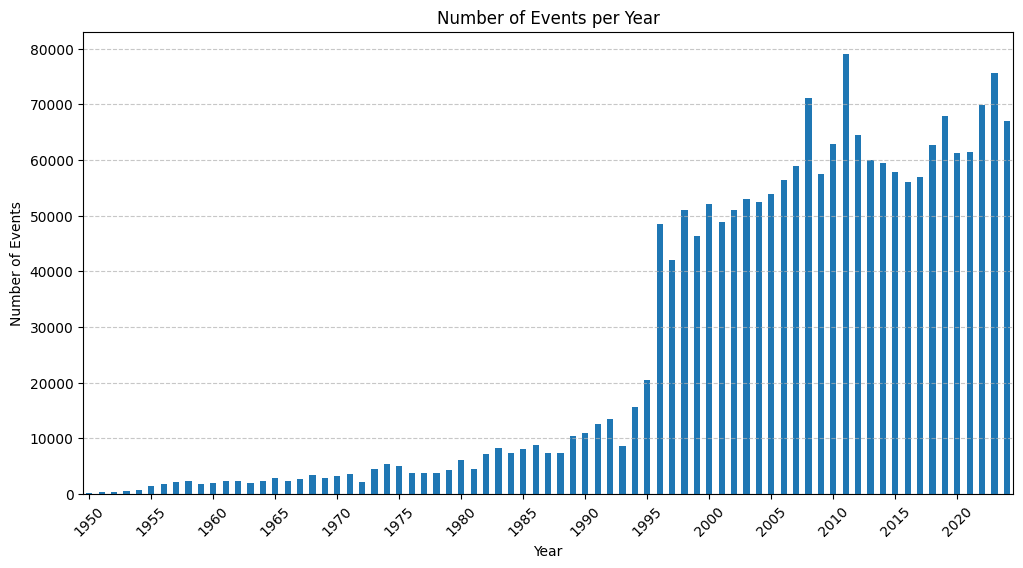

In [27]:
import matplotlib.pyplot as plt

# Group by year and count events
yearly_counts = df_combined.groupby('YEAR')['EVENT_ID'].count()

# Create the bar plot
plt.figure(figsize=(12, 6))
yearly_counts.plot(kind='bar')

# Customize labels
plt.xlabel("Year")
plt.ylabel("Number of Events")
plt.title("Number of Events per Year")

# Set x-axis ticks to show only years that are multiples of 5 or 0
years = yearly_counts.index.astype(int)  # Ensure years are integers
tick_positions = [i for i, year in enumerate(years) if year % 5 == 0]
tick_labels = [year for year in years if year % 5 == 0]
plt.xticks(tick_positions, tick_labels, rotation=45)
# plt.yscale('log')

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()
